In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
# 문장 토큰화, 예측 모델을 훈련하려면 한 단 계 더 나아가 문장을 여러 개의 작은 문장으로 나누는 작업을 수행해야 함.
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

print(input_sequences[:7])

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70]]


In [4]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                           maxlen=max_sequence_len, padding='pre'))

In [5]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1] # 입력 시퀀스에서 레이블을 분리하는 코드
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # 레이블을 훈련에 사용할 수 있는 원-핫 인코딩으로 변환 -> to_categorical 함수 사용

In [6]:
print(xs[6])
print(ys[6])


[ 0  0  0  4  2 66  8 67 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# 모델 만들기
model = Sequential()
model.add(Embedding(total_words, 8)) # 임베딩 층 :: 임베딩에서는 단어 하나당 벡터 하나가 필요. !!: 파라미터 개수는 전체 단어 수와 임베딩 차원 수의 곱이 됨.(단어 많지 않기에 8차원이면 충분)
model.add(Bidirectional(LSTM(max_sequence_len-1))) # LSTM 층 :: 양방향 LSTM 층을 만들고 뉴런 개수는 시퀀스 최대 길이보다 1 작게 지정함.
model.add(Dense(total_words, activation='softmax')) # 밀집 층 :: 전체 단어 개수의 뉴런을 가진 밀집 층임. 이 층의 각 뉴런은 입력값에 대해 다음 단어에 해당하는 모든 단어의 확률을 출력함.

2024-08-12 14:20:29.654718: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-12 14:20:29.654754: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-12 14:20:29.654761: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-12 14:20:29.655023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-12 14:20:29.655040: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=10, verbose=1)

Epoch 1/10


2024-08-12 14:20:30.480469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0121 - loss: 5.5711
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0487 - loss: 5.5621
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0499 - loss: 5.5505
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0419 - loss: 5.5268
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0615 - loss: 5.4601
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.0525 - loss: 5.3366
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0456 - loss: 5.2125
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.0499 - loss: 5.0926
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0501 - loss: 5.0771
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0406 - loss: 5.0750


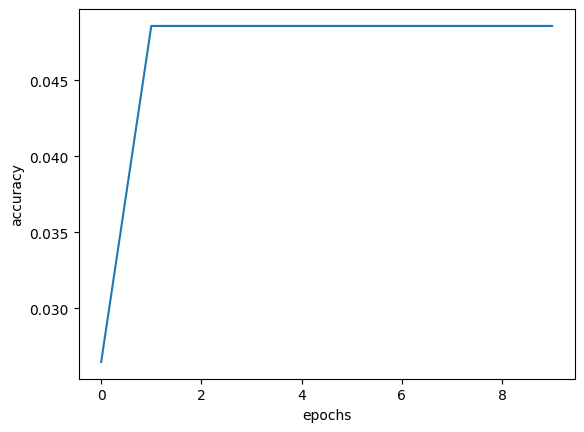

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [10]:
seed_text = "in the town of athy"

In [11]:
# texts_to_sequences 메서드를 사용해 토큰으로 바꾸어야 함.
token_list = tokenizer.texts_to_sequences([seed_text])[0] # 하나의 값만 전달하지만 배열을 반환하기 때문에 반환하는 배열의 첫 번째 원소를 선택한다.

In [12]:
# 다음으로 훈련 데이터와 동일한 크기로 만들기 위해 패딩을 추가한다.
token_list = pad_sequences([token_list],
                           maxlen=max_sequence_len-1, padding='pre')

In [13]:
# 토큰 리스트의 다음 단어를 예측하기 위해 model.predict를 호출한다.
predicted = np.argmax(model.predict(token_list), axis=-1) # model.predict()는 말뭉치에 있는 각 단어에 대한 확률을 반환한다. -> np.argmax 함수에 전달 -> 가장 큰 인덱스
print(predicted) # 반환값: 68

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
[1]


In [14]:
tokenizer.index_word[68]

'one'

In [15]:
# 예츨을 연결해 텍스트 생성하기
seed_text = "sweet jeremy saw dublin"
next_words=5
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
sweet jeremy saw dublin and and and and and


횡설수설한 문장이 되어버렸다!!!???

1. 훈련 텍스트가 정말 작아 사용할 문맥이 거의 없기 때문
2. 시퀀스의 다음 단어 예측이 이전 단어에 의존하기 때문


In [16]:
data = open('./irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

In [17]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [18]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [19]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                           maxlen=max_sequence_len, padding='pre'))

In [20]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [21]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))


In [22]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000)

Epoch 1/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.0623 - loss: 7.2079
Epoch 2/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.0657 - loss: 6.3803
Epoch 3/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.0655 - loss: 6.3170
Epoch 4/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.0678 - loss: 6.2861
Epoch 5/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.0685 - loss: 6.1683
Epoch 6/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.0631 - loss: 6.1426
Epoch 7/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.0643 - loss: 6.1217
Epoch 8/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.0675 - loss: 6.0631
Epoch 9/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.0681 - loss: 6.0151
Epoch 10/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.0695 - loss: 5.9626
Epoch 11/1000
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.0715 - loss: 5.8546
Epoch 12

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 모델을 향상할 수 있는 한 가지 방법은 여러 개의 LSTM 층을 쌓는 형식으로 구조를 변경하는 것.
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()